In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df["Exited"].value_counts()
#there is imabalance classification problem

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace= True)

In [9]:
print(df.shape)
df.head()

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df_encoded = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True, dtype=int)


In [11]:
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [12]:
from sklearn.model_selection import train_test_split

X =df_encoded.drop(columns = ["Exited"])
y =df_encoded["Exited"] 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state= 7)

In [13]:
X_train.shape

(8000, 11)

In [14]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled

array([[-0.22482832,  0.09984529,  1.37778936, ..., -0.57581067,
        -0.57600312,  0.91578261],
       [-0.8357854 , -0.84857831, -1.03726649, ..., -0.57581067,
        -0.57600312,  0.91578261],
       [-0.98075826,  0.66889946, -0.69225851, ..., -0.57581067,
         1.73610172,  0.91578261],
       ...,
       [ 0.34470794, -0.37436651,  0.34276543, ..., -0.57581067,
        -0.57600312,  0.91578261],
       [ 0.36541835, -0.46920887,  1.37778936, ..., -0.57581067,
         1.73610172,  0.91578261],
       [ 0.76927133, -1.22794775,  0.34276543, ..., -0.57581067,
        -0.57600312,  0.91578261]])

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

2024-04-16 07:13:15.852327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 07:13:15.852493: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 07:13:16.024320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
model = Sequential()

model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(1,activation ="relu" ))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss = "binary_crossentropy",optimizer = "Adam",metrics = ["accuracy"])

In [20]:
history = model.fit(X_train_scaled,y_train,epochs = 100,validation_split =0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5662 - loss: 4.0265 - val_accuracy: 0.6300 - val_loss: 3.4151
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - loss: 2.7490 - val_accuracy: 0.6862 - val_loss: 2.7436
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7068 - loss: 2.2086 - val_accuracy: 0.7331 - val_loss: 2.4354
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7493 - loss: 2.0318 - val_accuracy: 0.7369 - val_loss: 2.3685
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7545 - loss: 1.8667 - val_accuracy: 0.7444 - val_loss: 2.2014
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7623 - loss: 1.7865 - val_accuracy: 0.7425 - val_loss: 2.0561
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7594 - loss: 1.6153 - val_accuracy: 0.7450 - val_loss: 1.6898
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7599 - loss: 1.4164 - val_accu

In [21]:
model.layers[0].get_weights()

[array([[-0.35203353,  0.01641772,  0.09825382,  0.03631517,  0.23994708,
          0.33868074,  0.14317511, -0.4077748 , -0.15638098,  0.25081632,
         -0.11585618],
        [ 0.2931745 , -0.44987717, -0.19641882,  0.1005481 , -0.182015  ,
         -0.57123995, -0.25886017,  0.45079207,  0.53699285,  0.11069325,
         -0.26668236],
        [-0.3356404 ,  0.19834067,  0.00265497, -0.13867569,  0.20174156,
          0.21283363, -0.3330155 , -0.35324126, -0.20107536,  0.13472183,
          0.42573112],
        [-0.11228164,  0.37670437,  0.39953253, -0.7185845 ,  0.3064645 ,
          0.2013409 ,  0.25353092,  0.04503931, -0.20020933,  0.43344298,
          0.12941106],
        [ 0.36728063,  0.10614663,  0.8770397 , -0.6029995 , -0.63828254,
         -0.09313525,  0.12490362,  0.20847562, -0.031708  , -0.13838564,
         -0.02718586],
        [ 0.2234734 , -0.03599954,  0.18237737,  0.24424061,  0.10246404,
          0.16869827,  0.26850235, -0.01230224,  0.20442213, -0.0055615

In [22]:
model.layers[1].get_weights()

[array([[-0.27222955],
        [-0.30991405],
        [ 0.47396466],
        [ 0.17124178],
        [ 0.48590124],
        [-0.26969436],
        [ 0.06688465],
        [ 0.2559143 ],
        [ 0.09837176],
        [-0.08553573],
        [ 0.13510832]], dtype=float32),
 array([0.06775052], dtype=float32)]

In [23]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [24]:
y_pred= np.where(y_log>0.5,1,0)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.835

In [26]:
import matplotlib.pyplot as plt

In [27]:
history

In [28]:
history.history

{'accuracy': [0.6014062762260437,
  0.6792187690734863,
  0.7115625143051147,
  0.7451562285423279,
  0.7532812356948853,
  0.7607812285423279,
  0.7623437643051147,
  0.7639062404632568,
  0.7728124856948853,
  0.7548437714576721,
  0.7578125,
  0.7565624713897705,
  0.7595312595367432,
  0.7440624833106995,
  0.7629687786102295,
  0.7759374976158142,
  0.7823437452316284,
  0.7906249761581421,
  0.7890625,
  0.7953125238418579,
  0.7945312261581421,
  0.8017187714576721,
  0.803906261920929,
  0.8076562285423279,
  0.8096874952316284,
  0.8129687309265137,
  0.8131250143051147,
  0.8106250166893005,
  0.8131250143051147,
  0.8029687404632568,
  0.813281238079071,
  0.8199999928474426,
  0.8201562762260437,
  0.8129687309265137,
  0.8206250071525574,
  0.8060937523841858,
  0.8174999952316284,
  0.8240625262260437,
  0.8228124976158142,
  0.8224999904632568,
  0.8229687213897705,
  0.7876562476158142,
  0.7890625,
  0.8157812356948853,
  0.8217187523841858,
  0.8245312571525574,
  0.8

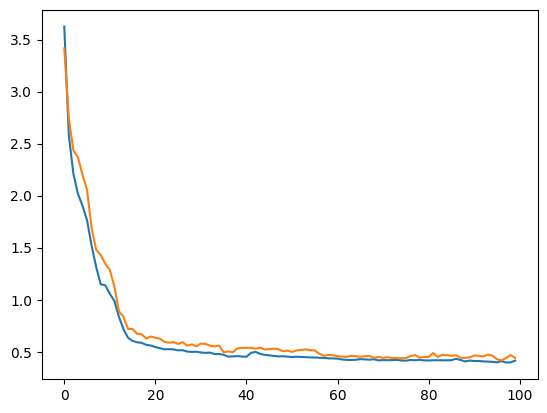

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])